In [1]:
import face_alignment
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
from PIL import Image
import glob
import math
import time

In [2]:
def draw_output(image, pred):
#     ax = plt.gca()
    implot = plt.imshow(image)
    plt.scatter(pred[0][:,0], pred[0][:,1], c='w', s=3)
#     print(pred[0][0], pred[0][5])
#     print(pred[0][0][0], pred[0][5][0])
#     print(pred[0][0][1], pred[0][5][1])
#     l = mlines.Line2D([pred[0][0][0], pred[0][5][0]], [pred[0][0][1], pred[0][5][1]])
#     plt.gca().add_line(l)
    plt.show()

In [3]:
def draw_specific_output(image, pred):
    implot = plt.imshow(image)
    plt.scatter(pred[:len(pred),0], pred[:len(pred),1], c='w', s=3)
#     print(pred[0], pred[5])
#     print(pred[0][0], pred[5][0])
#     print(pred[0][1], pred[5][1])
#     l = mlines.Line2D([pred[0][0], pred[5][0]], [pred[0][1], pred[5][1]])
#     plt.gca().add_line(l)
    plt.show()

In [4]:
def euclidean_distance(p1, p2):
    distance = math.sqrt(math.pow((p1[0] - p2[0]),2) + math.pow((p1[1] - p2[1]),2))
    return distance

In [5]:
def calculate_distances(pred):
    list_distance = []
    for i in pred:
        for j in pred:
            distance = euclidean_distance(i, j)
            list_distance.append(distance)
    return list_distance

In [6]:
def calculate_distances_2objects(pred1, pred2):
    list_distance = []
    for i in pred1:
        for j in pred2:
            distance = euclidean_distance(i, j)
            list_distance.append(distance)
    return list_distance

In [7]:
def get_important_distances(pred):
    list_important_dist = []
    list_important_dist.append(euclidean_distance(pred[0][39], pred[0][43])) # 2 point inner eyes
    list_important_dist.append(euclidean_distance(pred[0][36], pred[0][39])) # 2 point inner-outer left eyes
    list_important_dist.append(euclidean_distance(pred[0][43], pred[0][46])) # 2 point inner-outer right eyes
    list_important_dist.append(euclidean_distance(pred[0][28], pred[0][30])) # 2 point upper nose
    list_important_dist.append(euclidean_distance(pred[0][30], pred[0][33])) # 2 point lower nose
    list_important_dist.append(euclidean_distance(pred[0][30], pred[0][31])) # 2 point upper-left nose
    list_important_dist.append(euclidean_distance(pred[0][33], pred[0][31])) # 2 point lower-left nose
    list_important_dist.append(euclidean_distance(pred[0][30], pred[0][35])) # 2 point upper-right nose
    list_important_dist.append(euclidean_distance(pred[0][33], pred[0][35])) # 2 point lower-right nose
    list_important_dist.append(euclidean_distance(pred[0][51], pred[0][57])) # 2 point vertical mouth
    list_important_dist.append(euclidean_distance(pred[0][48], pred[0][54])) # 2 point horizontal mouth
    return list_important_dist    
#     list_important.append(pred[0][19]) #left eyebrow
#     list_important.append(pred[0][24]) #right eyebrow
#     list_important.append(pred[0][36]) #outer left eyes
#     list_important.append(pred[0][39]) #inner left eyes
#     list_important.append(pred[0][46]) #outer right eyes
#     list_important.append(pred[0][43]) #inner right eyes
#     list_important.append(pred[0][27]) #nose
#     list_important.append(pred[0][28]) #nose
#     list_important.append(pred[0][30]) #nose
#     list_important.append(pred[0][33]) #nose
#     list_important.append(pred[0][31]) #left outer nose
#     list_important.append(pred[0][35]) #right outer nose
#     list_important.append(pred[0][51]) #upper mouth
#     list_important.append(pred[0][57]) #lower mouth
#     list_important.append(pred[0][48]) #left mouth
#     list_important.append(pred[0][54]) #right mouth

### Basic Landmarks Plotting

In [8]:
fa_2d = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device='cpu')

In [9]:
start_time = time.time()

input_2d_norm = io.imread('images/frontal/normal1.png')
preds_2d_norm = fa_2d.get_landmarks(input_2d_norm)

print("--- %s seconds ---" % (time.time() - start_time))

--- 141.82695722579956 seconds ---


In [10]:
print("X:\n", preds_2d_norm[0][:,0])
print("Y:\n", preds_2d_norm[0][:,1])

X:
 [392. 398. 404. 410. 421. 445. 469. 504. 552. 599. 623. 641. 670. 688.
 700. 712. 724. 451. 475. 504. 528. 546. 635. 653. 676. 700. 718. 581.
 581. 581. 576. 546. 558. 570. 587. 599. 481. 498. 522. 540. 522. 498.
 623. 647. 664. 676. 664. 641. 504. 528. 558. 570. 581. 605. 617. 599.
 581. 564. 546. 528. 510. 552. 564. 581. 611. 581. 564. 552.]
Y:
 [344. 392. 433. 475. 510. 540. 564. 581. 605. 599. 587. 575. 546. 510.
 475. 439. 398. 303. 291. 285. 291. 303. 315. 315. 315. 327. 344. 362.
 386. 410. 433. 445. 451. 457. 457. 457. 344. 338. 344. 356. 362. 356.
 368. 362. 362. 374. 380. 380. 498. 487. 481. 487. 487. 498. 516. 522.
 528. 528. 522. 516. 498. 498. 498. 504. 516. 504. 504. 498.]


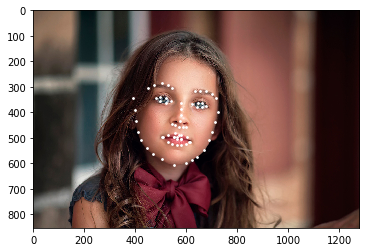

In [11]:
draw_output(input_2d_norm, preds_2d_norm)

In [12]:
start_time = time.time()

input_2d_down = io.imread('images/frontal/downsyndrome1.png')
preds_2d_down = fa_2d.get_landmarks(input_2d_down)

print("--- %s seconds ---" % (time.time() - start_time))

--- 17.743031978607178 seconds ---


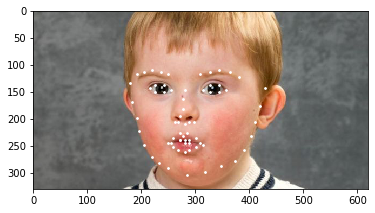

In [13]:
draw_output(input_2d_down, preds_2d_down)

In [15]:
preds_2d_norm_important = get_important_distances(preds_2d_norm)
preds_2d_norm_important

[107.16809226630845,
 60.207972893961475,
 24.758836806279895,
 47.265209192385896,
 24.73863375370596,
 32.31098884280702,
 26.832815729997478,
 33.24154027718932,
 29.0,
 41.43669871020132,
 114.42464769445436]

In [16]:
preds_2d_down_important = get_important_distances(preds_2d_down)
preds_2d_down_important

[72.56031973468694,
 38.2099463490856,
 21.400934559032695,
 30.4138126514911,
 18.35755975068582,
 14.422205101855956,
 17.46424919657298,
 28.635642126552707,
 17.46424919657298,
 29.274562336608895,
 64.19501538281614]

### Extract Features : normal

In [14]:
preds_2d_norm_important = get_important_distances(preds_2d_norm)
preds_2d_norm_important

[107.16809226630845,
 60.207972893961475,
 24.758836806279895,
 47.265209192385896,
 24.73863375370596,
 32.31098884280702,
 26.832815729997478,
 33.24154027718932,
 29.0,
 41.43669871020132,
 114.42464769445436]

#### outer

In [14]:
preds_2d_norm_outer = preds_2d_norm[0][:17]
preds_2d_norm_outer

array([[392., 344.],
       [398., 392.],
       [404., 433.],
       [410., 475.],
       [421., 510.],
       [445., 540.],
       [469., 564.],
       [504., 581.],
       [552., 605.],
       [599., 599.],
       [623., 587.],
       [641., 575.],
       [670., 546.],
       [688., 510.],
       [700., 475.],
       [712., 439.],
       [724., 398.]], dtype=float32)

In [15]:
print("X:\n", preds_2d_norm_outer[:len(preds_2d_norm_outer),0])
print("Y:\n", preds_2d_norm_outer[:len(preds_2d_norm_outer),1])

X:
 [392. 398. 404. 410. 421. 445. 469. 504. 552. 599. 623. 641. 670. 688.
 700. 712. 724.]
Y:
 [344. 392. 433. 475. 510. 540. 564. 581. 605. 599. 587. 575. 546. 510.
 475. 439. 398.]


[392. 344.] [445. 540.]
392.0 445.0
344.0 540.0


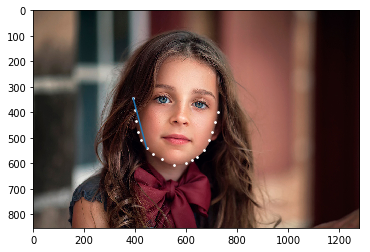

In [16]:
draw_specific_output(input_2d_norm, preds_2d_norm_outer)

#### inner

In [17]:
preds_2d_norm_inner = preds_2d_norm[0][17:]
len(preds_2d_norm_inner)

51

In [18]:
print("X:\n", preds_2d_norm_inner[:len(preds_2d_norm_inner),0])
print("Y:\n", preds_2d_norm_inner[:len(preds_2d_norm_inner),1])

X:
 [451. 475. 504. 528. 546. 635. 653. 676. 700. 718. 581. 581. 581. 576.
 546. 558. 570. 587. 599. 481. 498. 522. 540. 522. 498. 623. 647. 664.
 676. 664. 641. 504. 528. 558. 570. 581. 605. 617. 599. 581. 564. 546.
 528. 510. 552. 564. 581. 611. 581. 564. 552.]
Y:
 [303. 291. 285. 291. 303. 315. 315. 315. 327. 344. 362. 386. 410. 433.
 445. 451. 457. 457. 457. 344. 338. 344. 356. 362. 356. 368. 362. 362.
 374. 380. 380. 498. 487. 481. 487. 487. 498. 516. 522. 528. 528. 522.
 516. 498. 498. 498. 504. 516. 504. 504. 498.]


[451. 303.] [635. 315.]
451.0 635.0
303.0 315.0


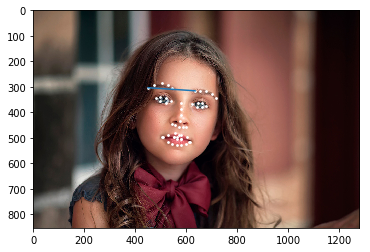

In [19]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner)

#### inner - eyebrows

In [20]:
preds_2d_norm_inner_eyebrows = preds_2d_norm_inner[:10]
print(preds_2d_norm_inner_eyebrows)
print(len(preds_2d_norm_inner_eyebrows))

[[451. 303.]
 [475. 291.]
 [504. 285.]
 [528. 291.]
 [546. 303.]
 [635. 315.]
 [653. 315.]
 [676. 315.]
 [700. 327.]
 [718. 344.]]
10


In [21]:
print("X:\n", preds_2d_norm_inner_eyebrows[:len(preds_2d_norm_inner_eyebrows),0])
print("Y:\n", preds_2d_norm_inner_eyebrows[:len(preds_2d_norm_inner_eyebrows),1])

X:
 [451. 475. 504. 528. 546. 635. 653. 676. 700. 718.]
Y:
 [303. 291. 285. 291. 303. 315. 315. 315. 327. 344.]


[451. 303.] [635. 315.]
451.0 635.0
303.0 315.0


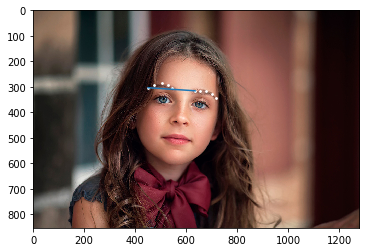

In [22]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_eyebrows)

#### inner - nose

In [23]:
preds_2d_norm_inner_nose = preds_2d_norm_inner[10:19]
print(preds_2d_norm_inner_nose)
print(len(preds_2d_norm_inner_nose))

[[581. 362.]
 [581. 386.]
 [581. 410.]
 [576. 433.]
 [546. 445.]
 [558. 451.]
 [570. 457.]
 [587. 457.]
 [599. 457.]]
9


In [24]:
print("X:\n", preds_2d_norm_inner_nose[:len(preds_2d_norm_inner_nose),0])
print("Y:\n", preds_2d_norm_inner_nose[:len(preds_2d_norm_inner_nose),1])

X:
 [581. 581. 581. 576. 546. 558. 570. 587. 599.]
Y:
 [362. 386. 410. 433. 445. 451. 457. 457. 457.]


[581. 362.] [558. 451.]
581.0 558.0
362.0 451.0


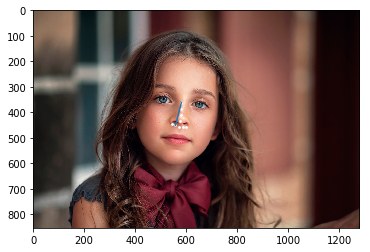

In [25]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_nose)

#### inner - eyes

In [26]:
preds_2d_norm_inner_eyes = preds_2d_norm_inner[19:31]
print(preds_2d_norm_inner_eyes)
print(len(preds_2d_norm_inner_eyes))

[[481. 344.]
 [498. 338.]
 [522. 344.]
 [540. 356.]
 [522. 362.]
 [498. 356.]
 [623. 368.]
 [647. 362.]
 [664. 362.]
 [676. 374.]
 [664. 380.]
 [641. 380.]]
12


In [27]:
print("X:\n", preds_2d_norm_inner_eyes[:len(preds_2d_norm_inner_eyes),0])
print("Y:\n", preds_2d_norm_inner_eyes[:len(preds_2d_norm_inner_eyes),1])

X:
 [481. 498. 522. 540. 522. 498. 623. 647. 664. 676. 664. 641.]
Y:
 [344. 338. 344. 356. 362. 356. 368. 362. 362. 374. 380. 380.]


[481. 344.] [498. 356.]
481.0 498.0
344.0 356.0


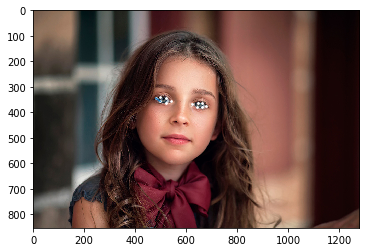

In [28]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_eyes)

#### inner - mouth

In [29]:
preds_2d_norm_inner_mouth = preds_2d_norm_inner[31:]
print(preds_2d_norm_inner_mouth)
print(len(preds_2d_norm_inner_mouth))

[[504. 498.]
 [528. 487.]
 [558. 481.]
 [570. 487.]
 [581. 487.]
 [605. 498.]
 [617. 516.]
 [599. 522.]
 [581. 528.]
 [564. 528.]
 [546. 522.]
 [528. 516.]
 [510. 498.]
 [552. 498.]
 [564. 498.]
 [581. 504.]
 [611. 516.]
 [581. 504.]
 [564. 504.]
 [552. 498.]]
20


In [30]:
print("X:\n", preds_2d_norm_inner_mouth[:len(preds_2d_norm_inner_mouth),0])
print("Y:\n", preds_2d_norm_inner_mouth[:len(preds_2d_norm_inner_mouth),1])

X:
 [504. 528. 558. 570. 581. 605. 617. 599. 581. 564. 546. 528. 510. 552.
 564. 581. 611. 581. 564. 552.]
Y:
 [498. 487. 481. 487. 487. 498. 516. 522. 528. 528. 522. 516. 498. 498.
 498. 504. 516. 504. 504. 498.]


[504. 498.] [605. 498.]
504.0 605.0
498.0 498.0


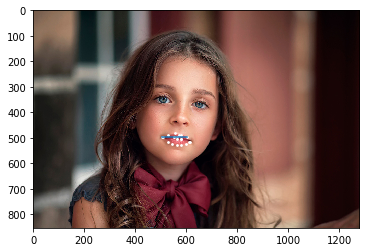

In [31]:
draw_specific_output(input_2d_norm, preds_2d_norm_inner_mouth)

### Extract Features : down syndrome

In [ ]:
preds_2d_down_important = get_important_distances(preds_2d_down)
preds_2d_down_important

#### outer

In [32]:
preds_2d_down_outer = preds_2d_down[0][:17]
print(preds_2d_down_outer)
print(len(preds_2d_down_outer))

[[178. 134.]
 [182. 168.]
 [191. 198.]
 [195. 223.]
 [204. 249.]
 [220. 270.]
 [233. 282.]
 [250. 291.]
 [284. 304.]
 [318. 299.]
 [347. 287.]
 [373. 278.]
 [390. 257.]
 [403. 232.]
 [411. 206.]
 [419. 177.]
 [428. 143.]]
17


In [33]:
print("X:\n", preds_2d_down_outer[:len(preds_2d_down_outer),0])
print("Y:\n", preds_2d_down_outer[:len(preds_2d_down_outer),1])

X:
 [178. 182. 191. 195. 204. 220. 233. 250. 284. 318. 347. 373. 390. 403.
 411. 419. 428.]
Y:
 [134. 168. 198. 223. 249. 270. 282. 291. 304. 299. 287. 278. 257. 232.
 206. 177. 143.]


[178. 134.] [220. 270.]
178.0 220.0
134.0 270.0


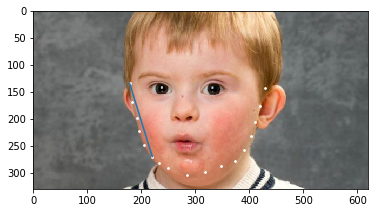

In [34]:
draw_specific_output(input_2d_down, preds_2d_down_outer)

#### inner

In [35]:
preds_2d_down_inner = preds_2d_down[0][17:]
print(preds_2d_down_inner)
print(len(preds_2d_down_inner))

[[191. 117.]
 [204. 113.]
 [220. 109.]
 [237. 113.]
 [250. 117.]
 [309. 117.]
 [326. 113.]
 [343. 109.]
 [364. 113.]
 [381. 122.]
 [280. 147.]
 [276. 164.]
 [276. 181.]
 [271. 194.]
 [263. 206.]
 [267. 206.]
 [280. 210.]
 [288. 206.]
 [297. 206.]
 [216. 143.]
 [225. 138.]
 [242. 138.]
 [254. 147.]
 [242. 151.]
 [225. 151.]
 [314. 147.]
 [326. 138.]
 [343. 138.]
 [356. 147.]
 [343. 151.]
 [326. 151.]
 [250. 244.]
 [259. 236.]
 [271. 227.]
 [276. 232.]
 [284. 227.]
 [301. 236.]
 [314. 249.]
 [301. 253.]
 [288. 257.]
 [280. 261.]
 [267. 257.]
 [259. 253.]
 [254. 244.]
 [271. 240.]
 [280. 240.]
 [288. 240.]
 [309. 244.]
 [288. 244.]
 [280. 244.]
 [271. 240.]]
51


In [36]:
print("X:\n", preds_2d_down_inner[:len(preds_2d_down_inner),0])
print("Y:\n", preds_2d_down_inner[:len(preds_2d_down_inner),1])

X:
 [191. 204. 220. 237. 250. 309. 326. 343. 364. 381. 280. 276. 276. 271.
 263. 267. 280. 288. 297. 216. 225. 242. 254. 242. 225. 314. 326. 343.
 356. 343. 326. 250. 259. 271. 276. 284. 301. 314. 301. 288. 280. 267.
 259. 254. 271. 280. 288. 309. 288. 280. 271.]
Y:
 [117. 113. 109. 113. 117. 117. 113. 109. 113. 122. 147. 164. 181. 194.
 206. 206. 210. 206. 206. 143. 138. 138. 147. 151. 151. 147. 138. 138.
 147. 151. 151. 244. 236. 227. 232. 227. 236. 249. 253. 257. 261. 257.
 253. 244. 240. 240. 240. 244. 244. 244. 240.]


[191. 117.] [309. 117.]
191.0 309.0
117.0 117.0


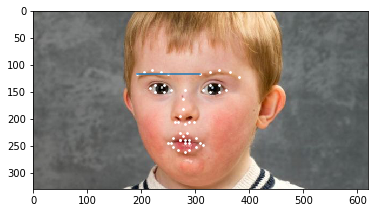

In [37]:
draw_specific_output(input_2d_down, preds_2d_down_inner)

#### inner - eyebrows

In [38]:
preds_2d_down_inner_eyebrows = preds_2d_down_inner[:10]
print(preds_2d_down_inner_eyebrows)
print(len(preds_2d_down_inner_eyebrows))

[[191. 117.]
 [204. 113.]
 [220. 109.]
 [237. 113.]
 [250. 117.]
 [309. 117.]
 [326. 113.]
 [343. 109.]
 [364. 113.]
 [381. 122.]]
10


In [39]:
print("X:\n", preds_2d_down_inner_eyebrows[:len(preds_2d_down_inner_eyebrows),0])
print("Y:\n", preds_2d_down_inner_eyebrows[:len(preds_2d_down_inner_eyebrows),1])

X:
 [191. 204. 220. 237. 250. 309. 326. 343. 364. 381.]
Y:
 [117. 113. 109. 113. 117. 117. 113. 109. 113. 122.]


[191. 117.] [309. 117.]
191.0 309.0
117.0 117.0


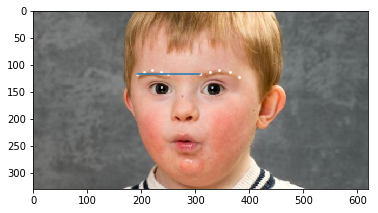

In [40]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyebrows)

#### inner - nose

In [41]:
preds_2d_down_inner_nose = preds_2d_down_inner[10:19]
print(preds_2d_down_inner_nose)
print(len(preds_2d_down_inner_nose))

[[280. 147.]
 [276. 164.]
 [276. 181.]
 [271. 194.]
 [263. 206.]
 [267. 206.]
 [280. 210.]
 [288. 206.]
 [297. 206.]]
9


In [42]:
print("X:\n", preds_2d_down_inner_nose[:len(preds_2d_down_inner_nose),0])
print("Y:\n", preds_2d_down_inner_nose[:len(preds_2d_down_inner_nose),1])

X:
 [280. 276. 276. 271. 263. 267. 280. 288. 297.]
Y:
 [147. 164. 181. 194. 206. 206. 210. 206. 206.]


[280. 147.] [267. 206.]
280.0 267.0
147.0 206.0


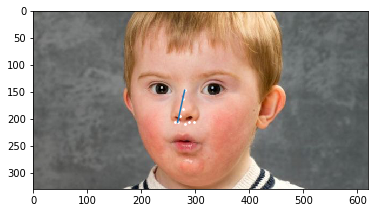

In [43]:
draw_specific_output(input_2d_down, preds_2d_down_inner_nose)

#### inner - eyes

In [44]:
preds_2d_down_inner_eyes = preds_2d_down_inner[19:31]
print(preds_2d_down_inner_eyes)
print(len(preds_2d_down_inner_eyes))

[[216. 143.]
 [225. 138.]
 [242. 138.]
 [254. 147.]
 [242. 151.]
 [225. 151.]
 [314. 147.]
 [326. 138.]
 [343. 138.]
 [356. 147.]
 [343. 151.]
 [326. 151.]]
12


In [45]:
print("X:\n", preds_2d_down_inner_eyes[:len(preds_2d_down_inner_eyes),0])
print("Y:\n", preds_2d_down_inner_eyes[:len(preds_2d_down_inner_eyes),1])

X:
 [216. 225. 242. 254. 242. 225. 314. 326. 343. 356. 343. 326.]
Y:
 [143. 138. 138. 147. 151. 151. 147. 138. 138. 147. 151. 151.]


[216. 143.] [225. 151.]
216.0 225.0
143.0 151.0


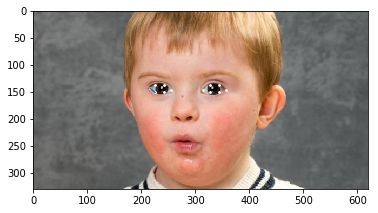

In [46]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyes)

In [47]:
preds_2d_down_inner_eyes_left = preds_2d_down_inner_eyes[:6]
preds_2d_down_inner_eyes_right = preds_2d_down_inner_eyes[6:]
print(len(preds_2d_down_inner_eyes_left))
print(len(preds_2d_down_inner_eyes_right))

6
6


In [48]:
print("left eyes")
print("X:\n", preds_2d_down_inner_eyes_left[:len(preds_2d_down_inner_eyes_left),0])
print("Y:\n", preds_2d_down_inner_eyes_left[:len(preds_2d_down_inner_eyes_left),1])
print("right eyes")
print("X:\n", preds_2d_down_inner_eyes_right[:len(preds_2d_down_inner_eyes_right),0])
print("Y:\n", preds_2d_down_inner_eyes_right[:len(preds_2d_down_inner_eyes_right),1])

left eyes
X:
 [216. 225. 242. 254. 242. 225.]
Y:
 [143. 138. 138. 147. 151. 151.]
right eyes
X:
 [314. 326. 343. 356. 343. 326.]
Y:
 [147. 138. 138. 147. 151. 151.]


[216. 143.] [225. 151.]
216.0 225.0
143.0 151.0


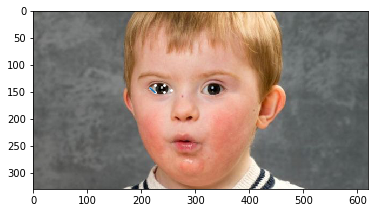

In [49]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyes_left)

[314. 147.] [326. 151.]
314.0 326.0
147.0 151.0


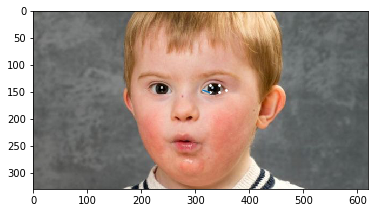

In [50]:
draw_specific_output(input_2d_down, preds_2d_down_inner_eyes_right)

#### inner - mouth

In [51]:
preds_2d_down_inner_mouth = preds_2d_down_inner[31:]
print(preds_2d_down_inner_mouth)
print(len(preds_2d_down_inner_mouth))

[[250. 244.]
 [259. 236.]
 [271. 227.]
 [276. 232.]
 [284. 227.]
 [301. 236.]
 [314. 249.]
 [301. 253.]
 [288. 257.]
 [280. 261.]
 [267. 257.]
 [259. 253.]
 [254. 244.]
 [271. 240.]
 [280. 240.]
 [288. 240.]
 [309. 244.]
 [288. 244.]
 [280. 244.]
 [271. 240.]]
20


In [52]:
print("X:\n", preds_2d_down_inner_mouth[:len(preds_2d_down_inner_mouth),0])
print("Y:\n", preds_2d_down_inner_mouth[:len(preds_2d_down_inner_mouth),1])

X:
 [250. 259. 271. 276. 284. 301. 314. 301. 288. 280. 267. 259. 254. 271.
 280. 288. 309. 288. 280. 271.]
Y:
 [244. 236. 227. 232. 227. 236. 249. 253. 257. 261. 257. 253. 244. 240.
 240. 240. 244. 244. 244. 240.]


[250. 244.] [301. 236.]
250.0 301.0
244.0 236.0


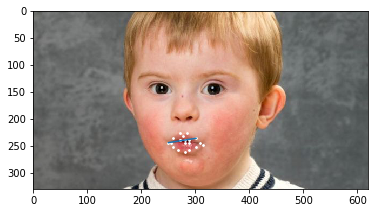

In [53]:
draw_specific_output(input_2d_down, preds_2d_down_inner_mouth)

### Extract Features : distances between landmarks

In [54]:
#### outer
list_distance_outer = calculate_distances(preds_2d_down_outer)
print(list_distance_outer)
print(len(list_distance_outer))

[0.0, 34.23448553724738, 65.30696746902278, 90.60905032059435, 117.90250209389112, 142.33762678926468, 157.88920165736477, 172.72232050317064, 200.33971149025845, 216.390850083824, 227.96929617823537, 242.40668307618913, 245.0979396078229, 245.41597340026587, 243.87086746883074, 244.80604567698077, 250.1619475459847, 34.23448553724738, 0.0, 31.32091952673165, 56.515484603779164, 83.93449827097318, 108.84851859350222, 124.88794977899188, 140.54536634126364, 170.0, 188.83061192507955, 203.43549346168678, 220.41097976280582, 226.24102192131292, 230.08042072284204, 232.13142829009604, 237.17082451262846, 247.2670621008791, 65.30696746902278, 31.32091952673165, 0.0, 25.317977802344327, 52.630789467763066, 77.62087348130012, 93.91485505499116, 110.13627921806692, 141.01418368376991, 162.265215003093, 179.60233851484227, 198.80643852752857, 207.56203891848818, 214.7091055358389, 220.14540649307222, 228.96506283710622, 243.29817097545143, 90.60905032059435, 56.515484603779164, 25.3179778023443

In [55]:
#### inner
list_distance_inner = calculate_distances(preds_2d_down_inner)
print(list_distance_inner)
print(len(list_distance_inner))

[0.0, 13.601470508735444, 30.083217912982647, 46.17358552246078, 59.0, 118.0, 135.05924625881784, 152.21038072352357, 173.04623659588788, 190.06577808748213, 93.92017887546851, 97.12878049270464, 106.40018796975878, 111.03603018840326, 114.47707194019246, 117.0341830406826, 128.7245120402482, 131.64345787011217, 138.4088147481944, 36.069377593742864, 39.96248240537617, 55.154328932550705, 69.77822009767804, 61.29437168288782, 48.08326112068523, 126.60568707605516, 136.6235704408284, 153.44380078712857, 167.70509831248424, 155.7562197795003, 139.21566003866087, 140.03570973148243, 137.05838172107534, 136.01470508735443, 143.0034964607509, 144.04513181638595, 162.0524606416083, 180.42449944505873, 174.91712323268982, 170.3202865192517, 169.28378540191025, 159.29846201391902, 152.0526224699857, 141.76741515595182, 146.72763884149435, 151.82226450688975, 156.64609794054877, 173.35801106380978, 159.80613254815975, 155.08062419270823, 146.72763884149435, 13.601470508735444, 0.0, 16.492422502

In [57]:
#### outer-inner
list_distance_outer_inner = calculate_distances_2objects(preds_2d_down_outer, preds_2d_down_inner)
print(list_distance_outer_inner)
print(len(list_distance_outer_inner))

[21.400934559032695, 33.421549934136806, 48.877397639399746, 62.625873247404705, 73.97972695272672, 132.09844813622905, 149.4824404403407, 166.88319268278636, 187.18172987767795, 203.35437049643167, 102.82509421342633, 102.48902380255166, 108.6876257906115, 110.6752004741803, 111.39569111954016, 114.47707194019246, 127.20062892926276, 131.46862743635836, 139.08630414242805, 39.05124837953327, 47.16990566028302, 64.1248781675256, 77.10382610480494, 66.21933252457322, 49.9799959983992, 136.61991070118586, 148.05404418657398, 165.04847772699995, 178.4740877550576, 165.873445734994, 148.9731519435633, 131.46862743635836, 130.24976007655445, 131.52186130069785, 138.59292911256333, 141.01418368376991, 159.7904878270293, 178.10390225932727, 171.14321488157222, 165.01212076693034, 162.88953311984167, 151.82226450688975, 143.95138068111746, 133.70115930686615, 141.01418368376991, 147.10540438746634, 152.7612516314265, 171.05846953600397, 155.56349186104046, 150.0133327407934, 141.01418368376991

In [59]:
#### outer-inner(eyebrows)
list_distance_outer_inner_eyebrows = calculate_distances_2objects(preds_2d_down_outer, preds_2d_down_inner_eyebrows)
print(list_distance_outer_inner_eyebrows)
print(len(list_distance_outer_inner_eyebrows))

[21.400934559032695, 33.421549934136806, 48.877397639399746, 62.625873247404705, 73.97972695272672, 132.09844813622905, 149.4824404403407, 166.88319268278636, 187.18172987767795, 203.35437049643167, 51.78802950489621, 59.23681287847955, 70.178344238091, 77.78174593052023, 85.0, 136.8575902169843, 154.1460346554526, 171.47011401407536, 190.12890364171355, 204.2473990042468, 81.0, 85.98837130682264, 93.60555539069249, 96.64884893261792, 100.20977996183805, 143.1258187749506, 159.53056133543816, 176.13914953808538, 192.753728887407, 204.63626267111115, 106.07544484940895, 110.3675676999362, 116.70903992407786, 117.74548823628021, 119.41942890501528, 155.66630977832037, 171.05846953600397, 186.81541692269406, 201.64572894063488, 211.65301793265317, 132.6386067478093, 136.0, 140.91131963046828, 139.94641831786907, 139.7855500400524, 168.66831356244717, 182.70194306574848, 197.28405916343064, 209.990475974507, 217.84857125994654, 155.72411502397438, 157.8131806916013, 161.0, 157.917700084569

In [60]:
#### outer-inner(eyes)
list_distance_outer_inner_eyes = calculate_distances_2objects(preds_2d_down_outer, preds_2d_down_inner_eyes)
print(list_distance_outer_inner_eyes)
print(len(list_distance_outer_inner_eyes))

[39.05124837953327, 47.16990566028302, 64.1248781675256, 77.10382610480494, 66.21933252457322, 49.9799959983992, 136.61991070118586, 148.05404418657398, 165.04847772699995, 178.4740877550576, 165.873445734994, 148.9731519435633, 42.20189569201838, 52.43090691567332, 67.08203932499369, 75.0, 62.36184731067546, 46.238512086787566, 133.6600164596728, 147.09180806557515, 163.77118183612157, 175.26266002774236, 161.89502771858065, 145.0, 60.41522986797286, 68.96375859826666, 78.74642849044012, 81.05553651663777, 69.35416353759881, 58.008620049092706, 133.15404612703287, 147.73286702694156, 163.41358572652396, 172.70205557549104, 159.10059710761615, 142.9475428260311, 82.71033792700887, 90.13878188659973, 97.12878049270464, 96.21330469326995, 85.98255637046388, 78.0, 141.19844191774922, 156.16017418023074, 170.67220043111882, 178.03651310896873, 164.58432489152787, 149.4824404403407, 106.6770828247567, 112.96902230257638, 117.32433677630571, 113.59577456930342, 105.1094667477673, 100.2247474

In [61]:
#### outer-inner(nose)
list_distance_outer_inner_nose = calculate_distances_2objects(preds_2d_down_outer, preds_2d_down_inner_nose)
print(list_distance_outer_inner_nose)
print(len(list_distance_outer_inner_nose))

[102.82509421342633, 102.48902380255166, 108.6876257906115, 110.6752004741803, 111.39569111954016, 114.47707194019246, 127.20062892926276, 131.46862743635836, 139.08630414242805, 100.22474744293447, 94.08506789071261, 94.89467845985885, 92.72000862812729, 89.47066558375433, 93.1074647920348, 106.62082348209472, 112.60550608207397, 121.1156472137271, 102.57680049601859, 91.54780172128658, 86.68333173107735, 80.09993757800315, 72.44308110509934, 76.4198926981712, 89.80534505250787, 97.32933781753577, 106.30145812734649, 114.02192771568107, 100.20977996183805, 91.2414379544733, 81.34494452638098, 70.09279563550022, 73.97972695272672, 85.98837130682264, 94.54099639838793, 103.40696301506973, 127.20062892926276, 111.39569111954016, 99.03534722511958, 86.68333173107735, 73.00684899377592, 76.27581530209953, 85.42247947700886, 94.36630754670864, 102.45974819410792, 136.85393673548452, 119.88327656516567, 105.152270541344, 91.52595260361949, 77.10382610480494, 79.40403012442127, 84.85281374238

In [62]:
#### outer-inner(mouth)
list_distance_outer_inner_mouth = calculate_distances_2objects(preds_2d_down_outer, preds_2d_down_inner_mouth)
print(list_distance_outer_inner_mouth)
print(len(list_distance_outer_inner_mouth))

[131.46862743635836, 130.24976007655445, 131.52186130069785, 138.59292911256333, 141.01418368376991, 159.7904878270293, 178.10390225932727, 171.14321488157222, 165.01212076693034, 162.88953311984167, 151.82226450688975, 143.95138068111746, 133.70115930686615, 141.01418368376991, 147.10540438746634, 152.7612516314265, 171.05846953600397, 155.56349186104046, 150.0133327407934, 141.01418368376991, 101.9803902718557, 102.7277956543408, 106.78014796768171, 113.718951806636, 117.83462988442744, 137.05838172107534, 154.8709139896837, 146.23952953972466, 138.4088147481944, 135.10366390294527, 123.0690862889621, 114.69088891450794, 104.6900186264192, 114.47707194019246, 121.60592090848209, 128.14054783713078, 148.00337833982033, 130.43005788544295, 124.01612798341996, 114.47707194019246, 74.81310045707235, 77.89736837660179, 85.09406559801923, 91.54780172128658, 97.41663102366043, 116.37869220780924, 133.15404612703287, 122.98373876248843, 113.53413583587978, 109.04127658827184, 96.213304693269

In [63]:
#### inner-inner (eyebrows-eyes)
list_distance_inner_eyebrows_eyes = calculate_distances_2objects(preds_2d_down_inner_eyebrows, preds_2d_down_inner_eyes)
print(list_distance_inner_eyebrows_eyes)
print(len(list_distance_inner_eyebrows_eyes))

[36.069377593742864, 39.96248240537617, 55.154328932550705, 69.77822009767804, 61.29437168288782, 48.08326112068523, 126.60568707605516, 136.6235704408284, 153.44380078712857, 167.70509831248424, 155.7562197795003, 139.21566003866087, 32.31098884280702, 32.64965543462902, 45.48626166217664, 60.4648658313239, 53.74011537017761, 43.41658669218482, 115.13470371699404, 124.53513560437472, 141.23030836190935, 155.7562197795003, 144.10065926289164, 127.7810627597063, 34.23448553724738, 29.427877939124322, 36.40054944640259, 50.99019513592785, 47.41307836451879, 42.2965719651132, 101.39033484509261, 109.89540481748998, 126.37246535539299, 141.20906486483082, 129.9730741346068, 114.0175425099138, 36.61966684720111, 27.730849247724095, 25.495097567963924, 38.01315561749642, 38.3275357934736, 39.84971769034255, 84.17244204607586, 92.44457799135652, 108.90821823902914, 123.76186811776881, 112.60550608207397, 96.77293009927931, 42.80186911806539, 32.64965543462902, 22.47220505424423, 30.2654919008

In [64]:
#### inner-inner (eyes-nose)
list_distance_inner_eyes_nose = calculate_distances_2objects(preds_2d_down_inner_eyes, preds_2d_down_inner_nose)
print(list_distance_inner_eyes_nose)
print(len(list_distance_inner_eyes_nose))

[64.1248781675256, 63.56886030125127, 71.02112361825881, 75.0066663703967, 78.60025445251433, 81.05553651663777, 92.65527507918802, 95.67131231461184, 102.61578825892242, 55.731499172371095, 57.245087125446844, 66.70832032063167, 72.47068372797375, 77.89736837660179, 79.92496481075234, 90.60353193998566, 92.69843580125827, 99.03534722511958, 39.05124837953327, 42.80186911806539, 54.817880294662984, 63.06346010171025, 71.16881339463234, 72.44998274671983, 81.41252974819048, 82.09750300709517, 87.45856161634491, 26.0, 27.80287754891569, 40.496913462633174, 49.9799959983992, 59.682493245507096, 60.41522986797286, 68.15423684555495, 68.09552114493287, 73.00684899377592, 38.2099463490856, 36.40054944640259, 45.34313619501854, 51.86520991955976, 58.872744118140105, 60.41522986797286, 70.178344238091, 71.7007670809734, 77.78174593052023, 55.14526271584895, 52.630789467763066, 59.16924876994806, 62.96824596572466, 66.85057965343307, 69.20260110718382, 80.65977932030313, 83.6301381082203, 90.60

In [65]:
#### inner-inner (eyes-mouth)
list_distance_inner_eyes_mouth = calculate_distances_2objects(preds_2d_down_inner_eyes, preds_2d_down_inner_mouth)
print(list_distance_inner_eyes_mouth)
print(len(list_distance_inner_eyes_mouth))

[106.56922632730333, 102.45974819410792, 100.40418317978589, 107.33592129385204, 108.07404868885037, 125.99206324209474, 144.3606594609487, 139.01438774457844, 134.8332303254654, 134.23859355639868, 124.88794977899188, 118.10588469674151, 107.91200118615167, 111.50784725749125, 116.21101496846157, 120.80149005703531, 137.2953021774598, 124.03628501370073, 119.57006314291216, 111.50784725749125, 108.90821823902914, 103.73041983911952, 100.18482919085105, 106.94391053257777, 106.78014796768171, 124.01612798341996, 142.27438279606065, 137.84411485442533, 134.6476884316994, 134.73678042761748, 126.19429464123962, 119.9208072020865, 109.89540481748998, 111.89280584559492, 115.88356225108029, 119.8874472161285, 135.2479205015737, 123.30855606972291, 119.41942890501528, 111.89280584559492, 106.30145812734649, 99.46356116689167, 93.60555539069249, 99.9599919967984, 98.41239759298622, 114.38968484964018, 132.30646242719968, 129.25169244539896, 127.58134659894448, 128.73616430514, 121.5976973466

In [66]:
#### inner-inner (nose-mouth)
list_distance_inner_nose_mouth = calculate_distances_2objects(preds_2d_down_inner_nose, preds_2d_down_inner_mouth)
print(list_distance_inner_nose_mouth)
print(len(list_distance_inner_nose_mouth))

[101.53324578678651, 91.44397191723465, 80.50465825031493, 85.09406559801923, 80.09993757800315, 91.44397191723465, 107.5174404457249, 108.06016842481785, 110.2905254316979, 114.0, 110.76551810017412, 108.06016842481785, 100.42410069301094, 93.43446901438462, 93.0, 93.34345183246653, 101.24228365658294, 97.32933781753577, 97.0, 93.43446901438462, 84.11896337925236, 73.97972695272672, 63.198101237299845, 68.0, 63.50590523722971, 76.21679604916491, 93.1074647920348, 92.44457799135652, 93.7709976485267, 97.082439194738, 93.43446901438462, 90.60905032059435, 82.96987405076617, 76.16429609731846, 76.10519036176179, 76.94153624668537, 86.53900854527974, 80.89499366462674, 80.09993757800315, 76.16429609731846, 68.15423684555495, 57.56735185849702, 46.2709412050371, 51.0, 46.69047011971501, 60.41522986797286, 77.89736837660179, 76.21679604916491, 76.94153624668537, 80.09993757800315, 76.53103945458993, 73.97972695272672, 66.73080248281148, 59.21148537234985, 59.135437767890075, 60.207972893961

In [67]:
#### inner-inner (left eyes-right eyes)
list_distance_inner_eyes_left_right = calculate_distances_2objects(preds_2d_down_inner_eyes_left, preds_2d_down_inner_eyes_right)
print(list_distance_inner_eyes_left_right)
print(len(list_distance_inner_eyes_left_right))

[98.08159868191383, 110.11357772772621, 127.09838708654017, 140.05713120009278, 127.251719045363, 110.2905254316979, 89.45389874119518, 101.0, 118.0, 131.30879635424276, 118.71394189394942, 101.83319694480774, 72.56031973468694, 84.0, 101.0, 114.35471131527551, 101.83319694480774, 85.0, 60.0, 72.56031973468694, 89.45389874119518, 102.0, 89.08984229416954, 72.11102550927978, 72.11102550927978, 85.0, 101.83319694480774, 114.0701538527936, 101.0, 84.0, 89.08984229416954, 101.83319694480774, 118.71394189394942, 131.06105447462264, 118.0, 101.0]
36
